In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sb

In [2]:
#Import Dataset
data = pd.read_csv("pitchdata.csv")

In [3]:
#Showing first 5 rows of the Dataset
data.head()

GameID  PitchNumber  Balls  Strikes  \
0  B1A1464A-7D3A-4CA6-9DE6-02E81D30EC10          122      0        0   
1  B1A1464A-7D3A-4CA6-9DE6-02E81D30EC10          124      0        2   
2  BC7DF282-9C14-4A29-866E-05E7BC0C7234          133      0        0   
3  BC7DF282-9C14-4A29-866E-05E7BC0C7234          134      0        1   
4  BC7DF282-9C14-4A29-866E-05E7BC0C7234          197      0        0   

  PitcherHand BatSide  PlateHeight  PlateSide  CalledStrike  
0           R       L     3.527729   0.249041             1  
1           R       L     5.241929   1.372541             0  
2           L       L     2.618399   0.083787             1  
3           L       L     2.901199   1.450787             0  
4           R       L     1.949099   0.823387             1

In [4]:
#Summary information of the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62577 entries, 0 to 62576
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GameID        62577 non-null  object 
 1   PitchNumber   62577 non-null  int64  
 2   Balls         62577 non-null  int64  
 3   Strikes       62577 non-null  int64  
 4   PitcherHand   62577 non-null  object 
 5   BatSide       62577 non-null  object 
 6   PlateHeight   62466 non-null  float64
 7   PlateSide     62466 non-null  float64
 8   CalledStrike  62577 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 4.3+ MB


In [5]:
# Clean Null Values using Column mean for Plate Height and Plate Side 


#Determine the Plate Height Column mean
mean1 = data.PlateHeight.mean()

#Replace Null values with Mean
data['PlateHeight'].fillna(value=mean1, inplace=True)

#Determine the Plate Side Column mean
mean2 = data.PlateSide.mean()

#Replace Null values with Mean
data['PlateSide'].fillna(value=mean2, inplace=True)

#Review if any Null Values Missed
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62577 entries, 0 to 62576
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GameID        62577 non-null  object 
 1   PitchNumber   62577 non-null  int64  
 2   Balls         62577 non-null  int64  
 3   Strikes       62577 non-null  int64  
 4   PitcherHand   62577 non-null  object 
 5   BatSide       62577 non-null  object 
 6   PlateHeight   62577 non-null  float64
 7   PlateSide     62577 non-null  float64
 8   CalledStrike  62577 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 4.3+ MB


In [6]:
#Drop Game ID (not required for Model)
data2=data.drop('GameID', axis = 1)
data2.head()

PitchNumber  Balls  Strikes PitcherHand BatSide  PlateHeight  PlateSide  \
0          122      0        0           R       L     3.527729   0.249041   
1          124      0        2           R       L     5.241929   1.372541   
2          133      0        0           L       L     2.618399   0.083787   
3          134      0        1           L       L     2.901199   1.450787   
4          197      0        0           R       L     1.949099   0.823387   

   CalledStrike  
0             1  
1             0  
2             1  
3             0  
4             1

In [7]:
#Key Statistics of the Dataset
data2.describe()

PitchNumber         Balls       Strikes   PlateHeight     PlateSide  \
count  62577.000000  62577.000000  62577.000000  62577.000000  62577.000000   
mean     145.069035      0.762964      0.729997      2.281051     -0.060027   
std       86.617028      0.931554      0.803104      1.159810      0.989732   
min        1.000000      0.000000      0.000000     -3.641154     -4.410613   
25%       71.000000      0.000000      0.000000      1.463867     -0.801142   
50%      142.000000      0.000000      1.000000      2.234599     -0.075098   
75%      214.000000      1.000000      1.000000      3.112535      0.679718   
max      370.000000      3.000000      2.000000      9.177937      5.231591   

       CalledStrike  
count  62577.000000  
mean       0.313150  
std        0.463779  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

In [8]:
#Change PitcherHand and Batside to Categorical Numerical Variables
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
data2['PitcherHand'] = lab_enc.fit_transform(data['PitcherHand'])
data2['BatSide'] = lab_enc.fit_transform(data['BatSide'])
data2.head()

PitchNumber  Balls  Strikes  PitcherHand  BatSide  PlateHeight  PlateSide  \
0          122      0        0            1        0     3.527729   0.249041   
1          124      0        2            1        0     5.241929   1.372541   
2          133      0        0            0        0     2.618399   0.083787   
3          134      0        1            0        0     2.901199   1.450787   
4          197      0        0            1        0     1.949099   0.823387   

   CalledStrike  
0             1  
1             0  
2             1  
3             0  
4             1

In [9]:
#Data Correlation Analysis
data2.corr()

PitchNumber     Balls   Strikes  PitcherHand   BatSide  \
PitchNumber      1.000000  0.043832  0.018037     0.048525 -0.009214   
Balls            0.043832  1.000000  0.350741     0.004096 -0.019583   
Strikes          0.018037  0.350741  1.000000    -0.002382  0.002586   
PitcherHand      0.048525  0.004096 -0.002382     1.000000 -0.095722   
BatSide         -0.009214 -0.019583  0.002586    -0.095722  1.000000   
PlateHeight     -0.001960 -0.003887 -0.078346    -0.005201 -0.021346   
PlateSide       -0.000402  0.000035 -0.041552    -0.117520 -0.178186   
CalledStrike    -0.006104 -0.051897 -0.253184    -0.005508  0.011572   

              PlateHeight  PlateSide  CalledStrike  
PitchNumber     -0.001960  -0.000402     -0.006104  
Balls           -0.003887   0.000035     -0.051897  
Strikes         -0.078346  -0.041552     -0.253184  
PitcherHand     -0.005201  -0.117520     -0.005508  
BatSide         -0.021346  -0.178186      0.011572  
PlateHeight      1.000000   0.184608      0.084809  
PlateSide        0.184608   1.000000      0.029883  
CalledStrike     0.084809   0.029883      1.000000

In [10]:
#Find Independent Column Correlations
def correlation(dataset,threshold):
    col_corr= [] # List of correlated columns
    corr_matrix=dataset.corr() #finding correlation between columns
    for i in range (len(corr_matrix.columns)): #Number of columns
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking correlation between columns
                colName=(corr_matrix.columns[i], corr_matrix.columns[j]) #getting correlated columns
                col_corr.append(colName) #adding correlated column name
    return col_corr #returning set of column names
col=correlation(data2,0.8)
print('Correlated columns @ 0.8:', col)

Correlated columns @ 0.8: []


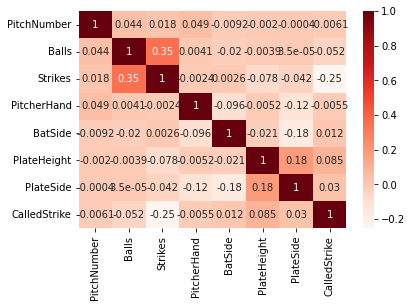

In [11]:
#Correlation Heatmap
dataplot = sb.heatmap(data2.corr(), cmap='Reds', annot=True, cbar=True)

In [12]:
# Create x and y variables
x = data2.drop('CalledStrike', axis = 1)
y = data2['CalledStrike']

#Split Dataset (80% Train, 20% Test)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=100)

#Scale the Dataset
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x_train2 = sc.fit_transform(x_train)
#x_test2 = sc.fit_transform(x_test)

In [13]:
#Create Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

for name, method in [('RDF',RandomForestClassifier(n_estimators=100,
                                                   random_state=100))]:
    method.fit(x_train,y_train)
    predict = method.predict(x_test)
    target_names = ['Ball', 'Strike']
    print('\nEstimator: {}'.format(name))
    print(confusion_matrix(y_test,predict))
    print(classification_report(y_test,predict,target_names=target_names))

In [ ]:
#Create Forecast Summary Table
predict2 = method.predict(x)
FcstTble=pd.DataFrame({'Pitch Number':data2.PitchNumber,'Plate Height':data2['PlateHeight'],
                       'Plate Side':data2['PlateSide'],'Predicted':predict2})
FcstTble.to_csv('PitchAnalysis-Prediction-NotScaled.csv',index=False)
print('\nForecast Table Summary Table')
FcstTble.head()


Forecast Table Summary Table


Pitch Number  Plate Height  Plate Side  Predicted
0           122      3.527729    0.249041          1
1           124      5.241929    1.372541          0
2           133      2.618399    0.083787          1
3           134      2.901199    1.450787          0
4           197      1.949099    0.823387          1

<AxesSubplot:xlabel='Plate Side', ylabel='Plate Height'>

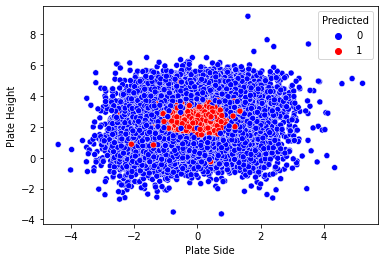

In [ ]:
#Graphic - Forecasted Strike Zone
sb.scatterplot(data=FcstTble, x="Plate Side", y="Plate Height", 
               hue="Predicted", palette=['blue','red'])